<a href="https://colab.research.google.com/github/Trev621/GenAI/blob/main/HW2/problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: Trevor Lacoste
The purpose of this assignment is to compare the performance of a simple Multi-Layer Perceptron (MLP) and a Convolutional Neural Network (CNN) using strides on the CIFAR-10 dataset.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets
#from notebooks.utils import display

In [7]:
#Load the dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [8]:
#Normalize the images
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [9]:
#Function to create MLP model
def create_mlp_model(input_shape):
  model = models.Sequential() #Sequential model

  model.add(layers.Flatten(input_shape = input_shape)) #Flatten layer
  model.add(layers.Dense(500, activation = 'relu')) #Dense layer
  model.add(layers.Dropout(.5)) #Dropout layer
  model.add(layers.Dense(250, activation = 'relu')) #Another dense layer

  model.add(layers.Dense(10, activation = 'softmax')) #Output layer

  #Compile model
  model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

  return model

#Creating the MLP model
input = (32, 32, 3)
mlpModel = create_mlp_model(input)
mlpModel.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 500)                 │       1,536,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,664,260 (6.35 MB)

 Trainable params: 1,664,260 (6.35 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#Training the model
results = mlpModel.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=.2, shuffle=True)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.1800 - loss: 2.2187 - val_accuracy: 0.2687 - val_loss: 1.9982
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.2279 - loss: 2.0330 - val_accuracy: 0.2671 - val_loss: 1.9671
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.2457 - loss: 1.9966 - val_accuracy: 0.3015 - val_loss: 1.9642
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.2547 - loss: 1.9795 - val_accuracy: 0.2976 - val_loss: 1.9635
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.2667 - loss: 1.9596 - val_accuracy: 0.2780 - val_loss: 1.9773
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.2695 - loss: 1.9481 - val_accuracy: 0.3064 - val_loss: 1.9641
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.2805 - loss: 1.9280 - val_accuracy: 0.2859 - val_loss: 1.9741
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.2812 -

In [11]:
#MLP Evaluation
mlpModel.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3312 - loss: 1.9150


[1.9144761562347412, 0.32919999957084656]

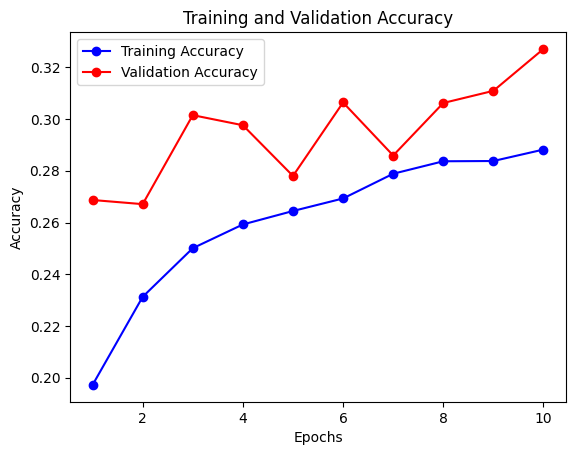

In [12]:
#Function to plot validation and training accuracies
def plotAccuracies(results):
    #Get training/validation accuracies from results
    trainAcc = results.history['accuracy']
    valAcc = results.history['val_accuracy']

    #Num epochs
    epochs = range(1, len(trainAcc) + 1)

    #Plotting training/validation accuracy
    plt.plot(epochs, trainAcc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, valAcc, 'ro-', label='Validation Accuracy')

    #Labels
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    #Show plot
    plt.show()

#Plotting MLP Model
plotAccuracies(results)

In [13]:
#Function to create CNN model
def create_cnn_model(input_shape):
  model = models.Sequential() #Sequential Model

  #First convolutional layer
  model.add(layers.Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same', input_shape = input_shape))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

  #Second convolutional layer
  model.add(layers.Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same', input_shape = input_shape))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

  #Third convolutional layer
  model.add(layers.Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same', input_shape = input_shape))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

  model.add(layers.Flatten()) #Flatten layer
  model.add(layers.Dense(300, activation = 'relu')) #Dense layer
  model.add(layers.Dropout(.5)) #Dropout layer

  model.add(layers.Dense(10, activation = 'softmax')) #Output layer

  #Compile model
  model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

  return model

#Creating the CNN Model
input = (32, 32, 3)
cnnModel = create_cnn_model(input)
cnnModel.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 16, 16, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 300)                 │         307,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           3,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 339,662 (1.30 MB)

 Trainable params: 339,406 (1.29 MB)

 Non-trainable params: 256 (1.00 KB)

In [14]:
#Training the model
cnnResult = cnnModel.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, shuffle=True)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 25ms/step - accuracy: 0.3488 - loss: 1.8226 - val_accuracy: 0.4504 - val_loss: 1.5070
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.5203 - loss: 1.3235 - val_accuracy: 0.5784 - val_loss: 1.1853
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.5828 - loss: 1.1685 - val_accuracy: 0.6239 - val_loss: 1.0600
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.6264 - loss: 1.0462 - val_accuracy: 0.5615 - val_loss: 1.2638
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.6602 - loss: 0.9635 - val_accuracy: 0.6555 - val_loss: 0.9913
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.6850 - loss: 0.8806 - val_accuracy: 0.6506 - val_loss: 0.9984
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.7102 - loss: 0.8205 - val_accuracy: 0.6438 - val_loss: 1.0333
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.7290 -

In [15]:
#CNN Evaluation
cnnModel.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6334 - loss: 1.1365


[1.1304036378860474, 0.6378999948501587]

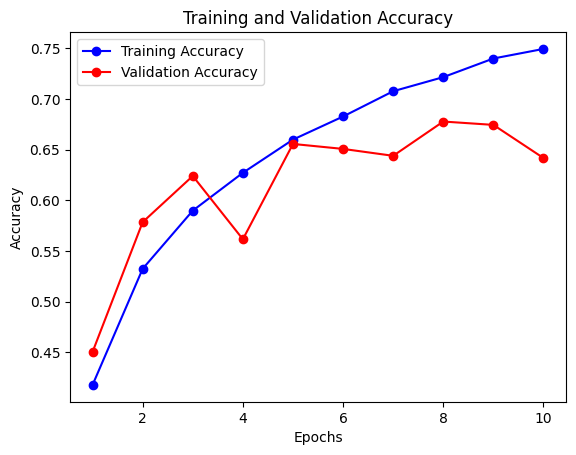

In [16]:
#Plotting CNN model
plotAccuracies(cnnResult)